# Stock Market Analysis of Google, Amazon, Microsoft and Apple

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data and make a dataframe
company_list=['AAPL_data.csv','GOOGL_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data=pd.DataFrame()
path=r'Time Series Data Analysis\individual_stocks_5yr'
for file in company_list:
    curr_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,curr_df])
all_data.shape

(5036, 7)

In [11]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [12]:
all_data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
1258,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


In [13]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [14]:
## Checking the data types of all the columns:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [15]:
## Changing the dtype of date column
all_data['date']=pd.to_datetime(all_data['date'])

In [16]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

# Analyse closing price of all the stocks:

In [17]:
tech_list=all_data['Name'].unique()

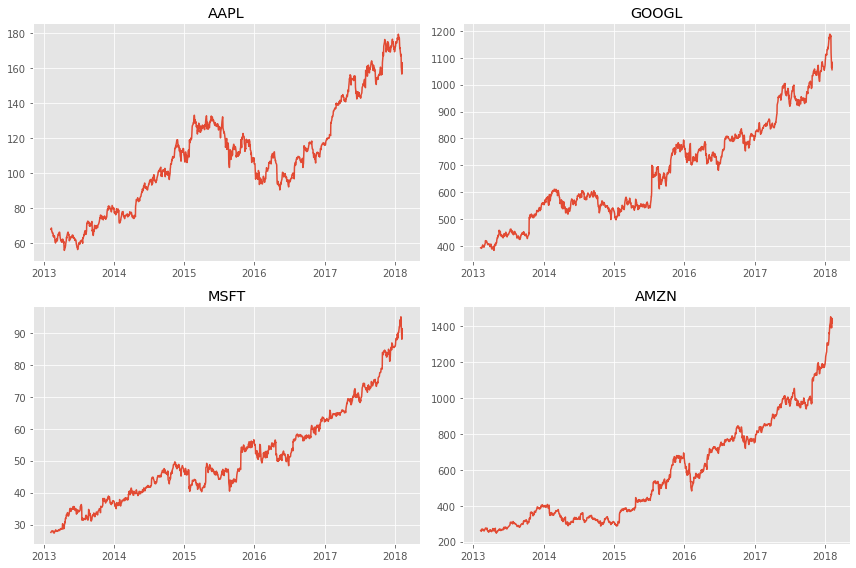

In [18]:
plt.figure(figsize=(12,8))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)
    plt.tight_layout()
    

# Analyse total volume of stock being traded each day:

In [19]:
def volume(company):
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

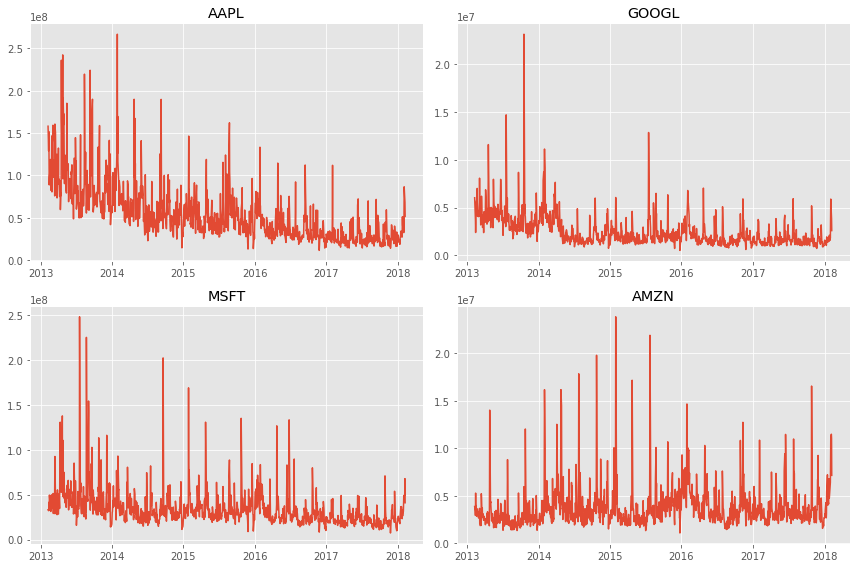

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
volume('AAPL')
plt.subplot(2,2,2)
volume('GOOGL')
plt.subplot(2,2,3)
volume('MSFT')
plt.subplot(2,2,4)
volume('AMZN')
plt.tight_layout()

# Analyse daily price change in Apple stocks:

Daily Stock Return Formula:
To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [23]:
df=pd.read_csv(r"Time Series Data Analysis\individual_stocks_5yr\AAPL_data.csv")

In [24]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [25]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [26]:
df['date']=pd.to_datetime(df['date'])

In [27]:
df['daily_price_change']=df['close']-df['open']

In [28]:
df['%return']=((df['close']-df['open'])/df['close'])*100

In [29]:
df.head()

,date,open,high,low,close,volume,Name,daily_price_change,%return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


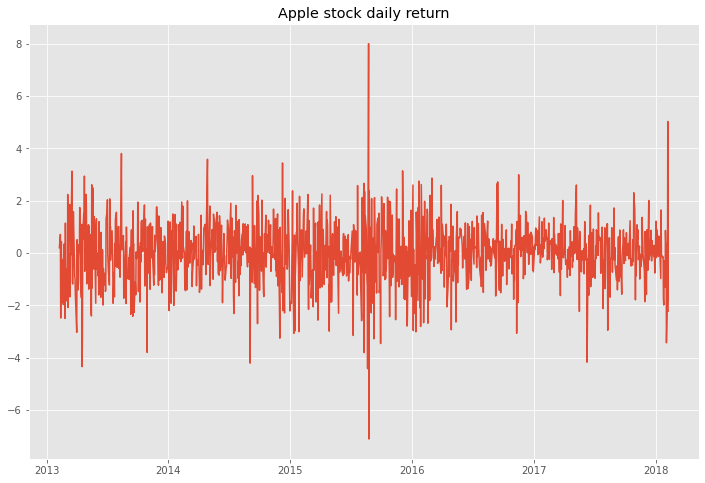

In [30]:
plt.figure(figsize=(12,8))
plt.plot(df['date'],df['%return'])
plt.title('Apple stock daily return')
plt.show()

# Analyse monthly mean of closing prices for Apple stocks:


In [32]:
df2=df.copy()

In [33]:
df2.head()

,date,open,high,low,close,volume,Name,daily_price_change,%return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [34]:
df2.set_index('date',inplace=True)

In [35]:
df2.head()

,open,high,low,close,volume,Name,daily_price_change,%return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [36]:
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

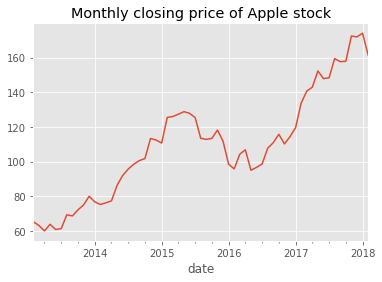

In [37]:
df2['close'].resample('M').mean().plot()
plt.title("Monthly closing price of Apple stock")
plt.show()

Conclusion: From the year 2016 the monthly closing price for Apple stocks started increasing rapidly.

# Analyse relation between stock prices of Amazon, Microsoft, Google and Apple:

In [38]:
apple=pd.read_csv(r'Time Series Data Analysis\individual_stocks_5yr\AAPL_data.csv')

In [39]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [40]:
microsoft=pd.read_csv(r'Time Series Data Analysis\individual_stocks_5yr\MSFT_data.csv')

In [41]:
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [42]:
amazon=pd.read_csv(r'Time Series Data Analysis\individual_stocks_5yr\AMZN_data.csv')

In [43]:
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [44]:
google=pd.read_csv(r'Time Series Data Analysis\individual_stocks_5yr\GOOGL_data.csv')

In [45]:
close=pd.DataFrame()

In [46]:
close['date']=amazon['date']
close['amazon']=amazon['close']
close['microsoft']=microsoft['close']
close['apple']=apple['close']
close['google']=google['close']


In [47]:
close.head()

,date,amazon,microsoft,apple,google
0,2013-02-08,261.95,27.55,67.8542,393.0777
1,2013-02-11,257.21,27.86,68.5614,391.6012
2,2013-02-12,258.70,27.88,66.8428,390.7403
3,2013-02-13,269.47,28.03,66.7156,391.8214
4,2013-02-14,269.24,28.04,66.6556,394.3039


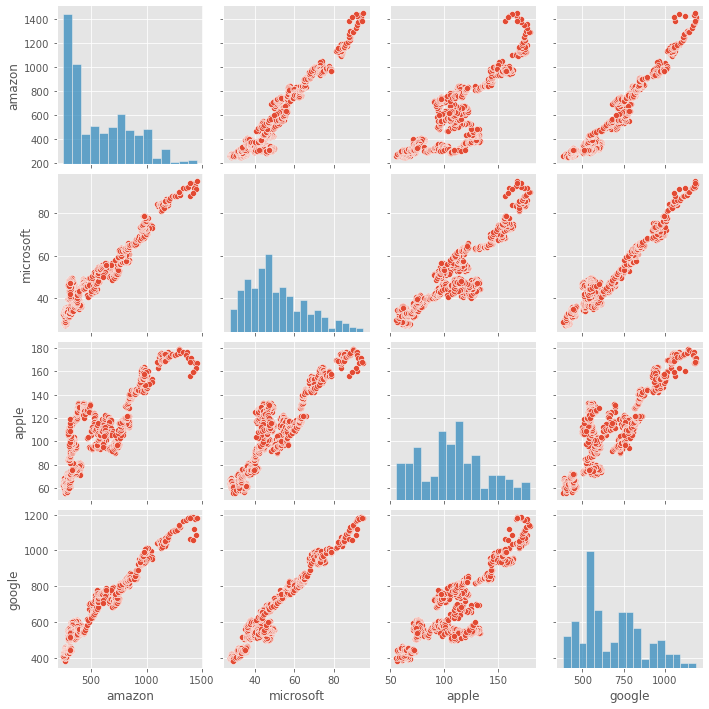

In [48]:
sns.pairplot(close)

<AxesSubplot:>

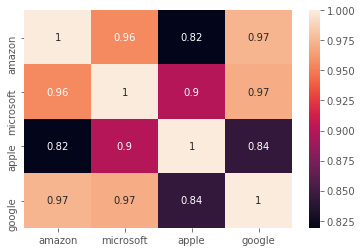

In [49]:
sns.heatmap(close.corr(),annot=True)

Conclusion: The closing stock prices of Google,Microsoft and Amazon are strongly correlated

# Analyse percentage daily return of each stock and their correlation:

In [50]:
daily_return=pd.DataFrame()

In [51]:
daily_return['app_return']=((apple['close']-apple['open'])/apple['close'])*100

In [52]:
daily_return['msft_return']=((microsoft['close']-microsoft['open'])/microsoft['close'])*100

In [53]:
daily_return['amzn_return']=((amazon['close']-amazon['open'])/amazon['close'])*100

In [54]:
daily_return['goog_return']=((google['close']-google['open'])/google['close'])*100

In [55]:
daily_return.head()

,app_return,msft_return,amzn_return,goog_return
0,0.206325,0.725953,0.209964,0.667196
1,0.714688,0.753769,-2.328836,0.513788
2,-2.481344,0.000000,-0.189409,-0.134514
3,-0.042869,0.356761,2.946525,0.348705
4,0.443624,0.427960,0.694548,1.026873


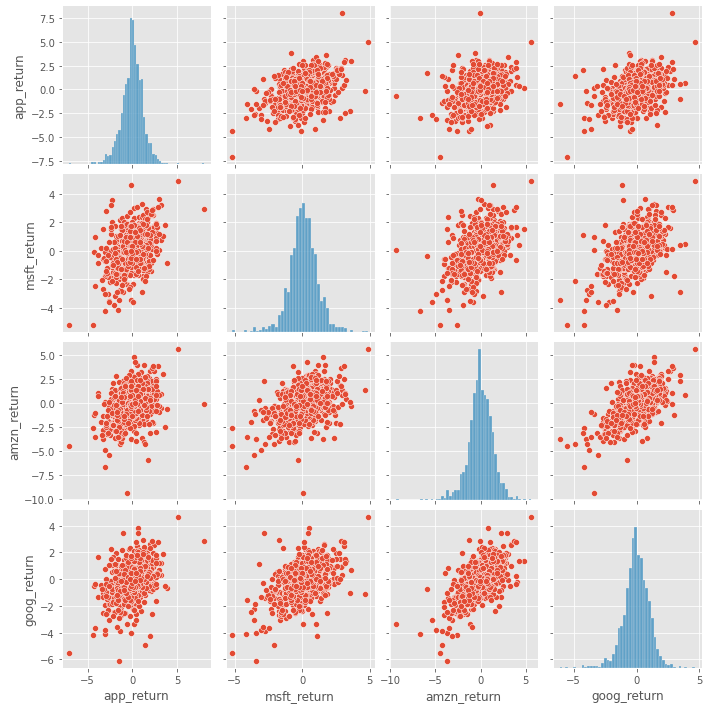

In [56]:
sns.pairplot(daily_return)

<AxesSubplot:>

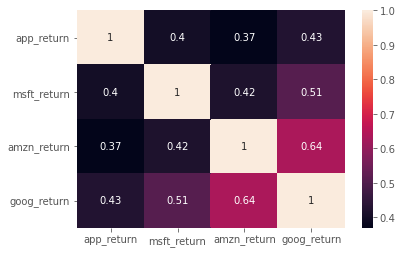

In [57]:
sns.heatmap(daily_return.corr(),annot=True)

Coclusion: If the percentage daily return of google is high then there is a 64% probability that the percentage daily return
of amazon will also be high

# Value at risk analysis for Apple, Microsoft, Google and Amazon Stocks:

In [58]:
data=daily_return.copy()

In [59]:
data.head()

,app_return,msft_return,amzn_return,goog_return
0,0.206325,0.725953,0.209964,0.667196
1,0.714688,0.753769,-2.328836,0.513788
2,-2.481344,0.000000,-0.189409,-0.134514
3,-0.042869,0.356761,2.946525,0.348705
4,0.443624,0.427960,0.694548,1.026873


For Apple stocks:

<AxesSubplot:xlabel='app_return', ylabel='Density'>

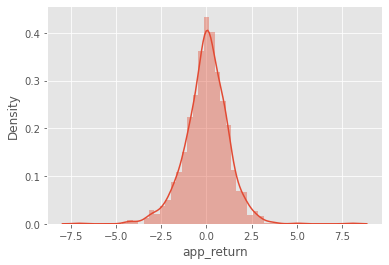

In [60]:
sns.distplot(data['app_return'])

We observe that the daily percentage return of apple stocks is almost normally distributed having mean equal to 0

In [61]:
data['app_return'].std()

1.1871377131421237

On any given day there was a 66% chance that the percentage return on apple stock would lie between -1.187 to 1.187

In [62]:
data['app_return'].std()*2

2.3742754262842474

On any given day there was a 95.6% chance that the percentage return on apple stock would lie between -2.37 to 2.37

In [63]:
data['app_return'].std()*3

3.561413139426371

On any given day there was a 99.7% chance that the percentage return on apple stock would lie between -3.56 to 3.56

In [64]:
data['app_return'].quantile(0.1)

-1.4246644227944307

On any given day there was a 90% chance that the worst daily loss on apple stocks would not exceed    -1.424

For Microsoft Stocks:

<AxesSubplot:xlabel='msft_return', ylabel='Density'>

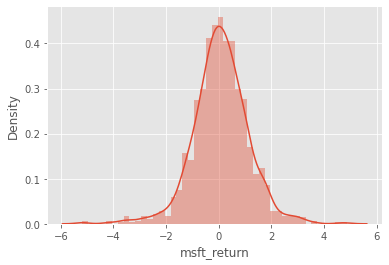

In [66]:
sns.distplot(data['msft_return'])

In [67]:
data['msft_return'].std()

1.059259601884536

On any given day there was a 66% chance that the percentage return on Microsoft stock would lie between -1.059 to 1.059

In [68]:
data['msft_return'].std()*2

2.118519203769072

On any given day there was a 95.6% chance that the percentage return on Microsoft stock would lie between -2.11 to 2.11

In [69]:
data['msft_return'].std()*3

3.177778805653608

On any given day there was a 99.7% chance that the percentage return on Microsoft stock would lie between -3.17 to 3.17

In [71]:
data['msft_return'].quantile(0.1)

-1.1385681979964504

On any given day there was a 90% chance that the worst daily loss on Microsoft stocks would not exceed    -1.13

For Amazon Stocks:

<AxesSubplot:xlabel='amzn_return', ylabel='Density'>

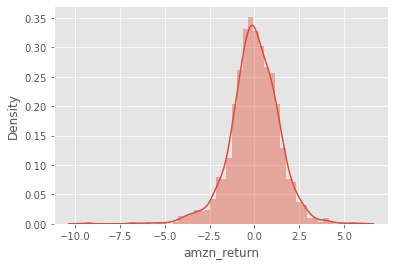

In [72]:
sns.distplot(data['amzn_return'])

In [73]:
data['amzn_return'].std()

1.35867860994955

On any given day there was a 66% chance that the percentage return on Amazon stock would lie between -1.358 to 1.358

In [74]:
data['amzn_return'].std()*2

2.7173572198991

On any given day there was a 95.6% chance that the percentage return on Amazon stock would lie between -2.17 to 2.17

In [75]:
data['amzn_return'].std()*3

4.07603582984865

On any given day there was a 99.7% chance that the percentage return on Amazon stock would lie between -4.07 to 4.07

In [76]:
data['amzn_return'].quantile(0.1)

-1.5247436499501366

On any given day there was a 90% chance that the worst daily loss on Amazon stocks would not exceed    -1.52

For Google Stocks:

<AxesSubplot:xlabel='goog_return', ylabel='Density'>

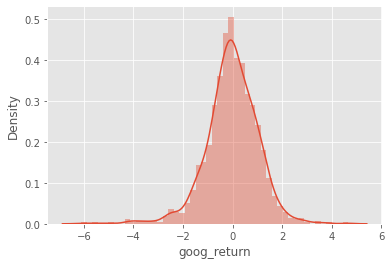

In [77]:
sns.distplot(data['goog_return'])

In [78]:
data['goog_return'].std()

1.052190772947712

On any given day there was a 66% chance that the percentage return on Google stock would lie between -1.05 to 1.05

In [79]:
data['goog_return'].std()*2

2.104381545895424

On any given day there was a 95.6% chance that the percentage return on Google stock would lie between -2.10 to 2.10

In [80]:
data['goog_return'].std()*3

3.156572318843136

On any given day there was a 99.7% chance that the percentage return on Google stock would lie between -3.15 to 3.15

In [81]:
data['goog_return'].quantile(0.1)

-1.2411807904171945

On any given day there was a 90% chance that the worst daily loss on Google stocks would not exceed    -1.24

Conclusion: In terms of worst daily return(loss) the Microsoft stocks has performed the best for the given timeline